In [144]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [145]:
# this is actually just a pair of perceptrons
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        # single layer neural network, so MLP is a misnomer
        self.layer = nn.Linear(self.input_dim, self.output_dim, bias=False)
    
    def forward(self, data):
        out = self.layer(data)
        return out

In [146]:
data = pd.read_csv('data-with-stats.csv', dtype=str)
data

,Do you want to be in society?,Do you make an attempt to socialise?,Do you consume things to alter your perspective? (Alcohol and stuff),Are you depressed?,Do you try to improve yourself?,Would you compromise with a friend?,If you and another person were both thirsty and you only had enough water for one person; would you share with the other person?,If a colleague invited you to do something with them; how would you answer? (Date; hang-out; party; etc.),Are you anxious of social interaction?,Do you think you fit in with other people?,...,Are you physically in-shape?,What is your biological sex?,How tall are you?,How attractive are you (from 0 to 10),What is your BMI?,How many friends and colleagues do you currently have?,Rate your life right now.,Which climate do you live in?,X,Y
0,Y,Y,Y,0,0,A,N,Y,0,A,...,N,othersex,11,23,34,43,53,polar,-3,2.25
1,D,A,0,A,A,D,Y,Y,0,0,...,Y,male,12,23,32,41,54,tropical,-1,4
2,D,0,Y,N,Y,Y,Y,Y,N,N,...,N,othersex,14,23,33,41,53,mild,-2,0.75
3,A,A,D,D,Y,N,N,N,A,N,...,Y,female,12,21,32,41,52,dry,-0.5,1.5
4,0,Y,Y,D,Y,0,Y,N,0,Y,...,D,female,14,22,32,41,52,snow,-3.5,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,A,A,0,Y,N,Y,Y,Y,0,...,0,female,15,24,31,43,54,dry,-0.5,3.5
196,Y,N,A,N,0,0,Y,Y,D,N,...,A,female,15,21,32,42,53,mild,-2.5,0.75
197,A,D,Y,N,D,N,N,N,0,0,...,0,female,11,22,32,42,51,tropical,0.5,-3.25
198,Y,A,Y,D,Y,N,Y,N,Y,A,...,D,female,12,23,31,42,52,tropical,0.5,3


In [147]:
results = data.values[:,-2:].astype(float)
results

array([[-3.  ,  2.25],
       [-1.  ,  4.  ],
       [-2.  ,  0.75],
       [-0.5 ,  1.5 ],
       [-3.5 , -2.  ],
       [-5.5 , -2.  ],
       [-7.  ,  2.25],
       [-3.5 , -2.  ],
       [-3.  ,  3.25],
       [ 0.5 ,  6.  ],
       [-2.  , -3.  ],
       [-5.  ,  0.75],
       [-6.  ,  3.5 ],
       [-2.  , -4.5 ],
       [-2.  ,  2.25],
       [-2.  ,  2.25],
       [-2.5 , -3.25],
       [ 3.  ,  0.75],
       [-6.  , -4.25],
       [-5.  ,  3.  ],
       [ 2.5 ,  2.25],
       [-3.  ,  0.5 ],
       [ 4.5 ,  2.5 ],
       [-1.  , -1.5 ],
       [-7.  , -2.25],
       [-2.  , -2.  ],
       [-2.  , -2.75],
       [-2.  ,  2.25],
       [-2.  , -1.5 ],
       [-4.  ,  0.  ],
       [ 0.  , -0.25],
       [-6.  ,  0.  ],
       [-1.  , -2.75],
       [ 3.  , -0.5 ],
       [-4.5 ,  0.5 ],
       [-4.  ,  4.25],
       [-2.  ,  0.75],
       [-3.  , -0.25],
       [ 1.  ,  2.5 ],
       [ 0.  , -4.5 ],
       [ 0.5 ,  5.25],
       [ 3.  ,  0.5 ],
       [-2.  , -3.25],
       [-5.

In [148]:
# one-hot encode the categorical data
answers = pd.get_dummies(data[data.columns[:-2]])
answers

,Do you want to be in society?_0,Do you want to be in society?_A,Do you want to be in society?_D,Do you want to be in society?_N,Do you want to be in society?_Y,Do you make an attempt to socialise?_0,Do you make an attempt to socialise?_A,Do you make an attempt to socialise?_D,Do you make an attempt to socialise?_N,Do you make an attempt to socialise?_Y,...,How many friends and colleagues do you currently have?_43,Rate your life right now._51,Rate your life right now._52,Rate your life right now._53,Rate your life right now._54,Which climate do you live in?_dry,Which climate do you live in?_mild,Which climate do you live in?_polar,Which climate do you live in?_snow,Which climate do you live in?_tropical
0,0,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,1,0,0,0,0
196,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
197,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
198,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


/home/nathanielbd/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


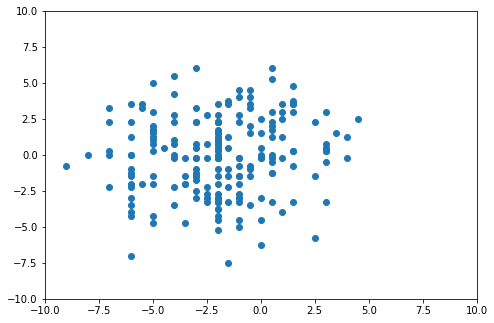

In [149]:
# plot all the results
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.scatter(results[:,0], results[:,1])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
fig.show()

In [150]:
answers = answers.values
answers = answers.astype(int)
results = results.astype(float)
# reserve 20 trials as testing data
CUTOFF = answers.shape[0]-20
train_ans, train_res = answers[:CUTOFF], results[:CUTOFF]
test_ans, test_res = answers[CUTOFF:], results[CUTOFF:]
# load the data as answers-results tuples
train_dataset = list(zip(torch.from_numpy(train_ans), torch.from_numpy(train_res)))
test_dataset = list(zip(torch.from_numpy(test_ans), torch.from_numpy(test_res)))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1)

In [ ]:
model = MultiLayerPerceptron(answers.shape[1], results.shape[1])
optimizer = optim.SGD(model.parameters(), lr=1e-4)
criterion = nn.L1Loss()
losses = []
EPOCHS = 5000
for epoch in range(EPOCHS):
    loss = 0
    for ans, res in train_loader:
        ans, res = ans.float(), res.float()
        optimizer.zero_grad()
        pred_res = model(ans)
        train_loss = criterion(pred_res, res)
        train_loss.backward()
        optimizer.step()
        loss += train_loss.item()
    losses.append(loss)
    if (epoch+1)%100==0:
        print(f'epoch: {epoch+1}/{EPOCHS}, loss: {loss}')

In [ ]:
for ans, res in test_loader:
    ans, res = ans.float(), res.float()
    pred_res = model(ans)
    loss = criterion(pred_res, res)
    print(f'loss: {loss}')

In [ ]:
params = list(model.parameters())
params

In [ ]:
x_weights = params[0][0].detach()
columns = pd.get_dummies(data[data.columns[:-2]]).columns
x_weights = pd.DataFrame(np.array([x_weights.numpy()]), columns=columns)
# observe from the .csv files that X is always in increments of 0.5
x_weights = x_weights.applymap(lambda val: round(val*2)/2)
x_weights

In [ ]:
y_weights = params[0][1].detach()
y_weights = pd.DataFrame(np.array([y_weights.numpy()]), columns=columns)
# observe from the .csv files that Y is always in increments of 0.25
y_weights = y_weights.applymap(lambda val: round(val*4)/4)
y_weights

In [ ]:
all_weights = pd.concat([x_weights, y_weights], ignore_index=True)
all_weights.index = ['X','Y']
all_weights.to_csv('weights.csv')
all_weights

In [ ]:
# see the losses after rounding the weights
x_tensor = torch.from_numpy(x_weights.values).float()
y_tensor = torch.from_numpy(y_weights.values).float()
for ans, res in test_loader:
    ans, res = ans.float(), res.float()
    pred_res = torch.from_numpy(np.array([[(ans@x_tensor.T).item()-2,(ans@y_tensor.T).item()-0.25]]))
    loss = criterion(pred_res, res)
    print(f'loss: {loss}')

In [ ]:
from collections import OrderedDict
model.load_state_dict(OrderedDict({'layer.weight': torch.from_numpy(np.array([x_tensor.numpy().flatten(), y_tensor.numpy().flatten()]))}), strict=False)
torch.save(model.state_dict(), 'model.pt')

In [ ]:
for ans, res in test_loader:
    ans, res = ans.float(), res.float()
    pred_res = model(ans)
    loss = criterion(pred_res, res)
    print(f'predicted: {pred_res.detach().numpy().flatten()}, actual: {res.detach().numpy().flatten()}, loss: {loss}')
    print(f'diff: {res.detach().numpy().flatten()-pred_res.detach().numpy().flatten()}')


In [ ]:
from itertools import product
# answers that affect X
nz_x = x_weights.loc[:,x_weights.any()]
yn_ls = []
for i in range(0,18,2):
    # answers to yes-no questions
    yn_ls.append([nz_x.iloc[:,i].item(), nz_x.iloc[:,i+1].item()])
# bio sex
yn_ls.append([nz_x.iloc[:,18].item(), nz_x.iloc[:,19].item(), nz_x.iloc[:,20].item()])
score_to_combs = dict(zip(np.arange(-10,11,0.5),[[] for i in range(41)]))
for comb in product(*yn_ls):
    score_to_combs[sum(comb)-2].append(comb)
score_to_combs
# higher values of X are definitely possible

In [ ]:
print(f'min X: {min(results[:,0])}')
print(f'max X: {max(results[:,0])}')
print(f'min Y: {min(results[:,1])}')
print(f'max Y: {max(results[:,1])}')

In [ ]:
# Let's get data outside of these ranges and pay close attention to the stats questions
stats_combs = []
for i in range(-9,-3):
    stats_combs.append(pd.unique(data.iloc[:,i]))
stats_combs
# product(*stats_combs)
# for comb in product(*stats_combs):
#     print(comb)

In [ ]:
real_data = pd.read_csv('data.csv', dtype=str)
real_results = real_data.values[:,-2:].astype(float)
real_answers = pd.get_dummies(real_data[real_data.columns[:-2]])
real_answers = real_answers.values
real_answers = real_answers.astype(int)
real_results = real_results.astype(float)
# reserve 20 trials as testing data
# CUTOFF = answers.shape[0]-20
real_train_ans, real_train_res = real_answers[:CUTOFF], real_results[:CUTOFF]
real_test_ans, real_test_res = real_answers[CUTOFF:], real_results[CUTOFF:]
# load the data as answers-results tuples
real_train_dataset = list(zip(torch.from_numpy(real_train_ans), torch.from_numpy(real_train_res)))
real_test_dataset = list(zip(torch.from_numpy(real_test_ans), torch.from_numpy(real_test_res)))
real_train_loader = torch.utils.data.DataLoader(real_train_dataset, batch_size=1)
real_test_loader = torch.utils.data.DataLoader(real_test_dataset, batch_size=1)

In [ ]:
real_model = MultiLayerPerceptron(real_answers.shape[1], real_results.shape[1])
# load pre-trained with rounded weights, but incorrect weights for stats questions
real_model.load_state_dict(torch.load('model.pt'))
real_optimizer = optim.Adam(real_model.parameters(), lr=1e-4)
# criterion = nn.L1Loss()
losses = []
EPOCHS = 10000
for epoch in range(EPOCHS):
    loss = 0
    for ans, res in real_train_loader:
        ans, res = ans.float(), res.float()
        real_optimizer.zero_grad()
        pred_res = real_model(ans)
        train_loss = criterion(pred_res, res)
        train_loss.backward()
        real_optimizer.step()
        loss += train_loss.item()
    losses.append(loss)
    if (epoch+1)%100==0:
        print(f'epoch: {epoch+1}/{EPOCHS}, loss: {loss}')

In [ ]:
model = MultiLayerPerceptron(answers.shape[1], results.shape[1])
model.load_state_dict(torch.load('model.pt'))
# # test_model = MultiLayerPerceptron(28, 2)
# test_model = nn.Sequential(
#     nn.Linear(28, 16),
#     nn.ReLU(),
#     nn.Linear(16, 8),
#     nn.ReLU(),
#     nn.Linear(8, 4),
#     nn.ReLU(),
#     nn.Linear(4, 2)
# )
# test_optimizer = optim.Adam(test_model.parameters(), lr=1e-4)
# for epoch in range(EPOCHS):
#     loss = 0
#     for ans, res in real_train_loader:
#         ans, res = ans.float(), res.float()
#         pred_res = model(ans)
#     #     loss = criterion(pred_res, res)
#         stats = ans[:,-28:]
#     #     print(stats.shape)
#     #     stats_columns = columns[-28:]
#     #     print(f'stats: {stats_columns[np.nonzero(stats.numpy().flatten())].values}')
#         diff = torch.from_numpy(pred_res.detach().numpy()-res.detach().numpy())
#         test_optimizer.zero_grad()
#         pred_diff = test_model(stats)
#         train_loss = criterion(pred_diff, diff)
#         train_loss.backward()
#         test_optimizer.step()
#         loss += train_loss.item()
# #     print(f'diff: {pred_res.detach().numpy().flatten()-res.detach().numpy().flatten()}')
# #     break
# #     print(f'loss: {loss}')
#     if (epoch+1)%100==0:
#         print(f'epoch: {epoch+1}/{EPOCHS}, loss: {loss}')
#     if loss <= 0.5:
#         break
for ans, res in real_train_loader:
    ans, res = ans.float(), res.float()
    pred_res = model(ans)
    stats = ans[:,-28:]
    stats_columns = columns[-28:]
    show_val = lambda encoding: encoding.split('_')[1]
    stuff = list(map(show_val, stats_columns[np.nonzero(stats.numpy().flatten())].values))
    if (stuff[1]=='15' or stuff[1]=='14') and (stuff[2]=='24' or stuff[2]=='23') and stuff[3]!='32' and stuff[4]!='41' and (stuff[5]=='53' or stuff[5]=='54'):
        print(f'stats: {list(map(show_val, stats_columns[np.nonzero(stats.numpy().flatten())].values))}')
        diff = torch.from_numpy(pred_res.detach().numpy().flatten()-res.detach().numpy().flatten())
        print(f'diff: {diff}, celibate: {ans[:,80]}')

In [ ]:
import json
# from collections import OrderedDict
# import requests
# response = json.loads(requests.get('http://dulm.blue/normie/stats.json').text)
response = json.load(open('stats.json'),)
total = response['all']['total']
del response['all']
# response
xy_avgs = {
    'wizard': [-8, -8],
    'edgelord': [-3, -8],
    'sadboy': [2.5, -8],
    'sociopath': [7.5, -8],
    'sperg': [-7, -3],
    'lamenormie': [-2, -3],
    'coolnormie': [3, -3],
    'basednormie': [8, -3],
    'failednormie': [-7, 3],
    'nichenormie': [-2, 3],
    'normie': [2.5, 3],
    'turbonormie': [7.5, 3],
    'outcast': [-8, 8],
    'simp': [-3, 8],
    'brad': [3, 8],
    'chad': [8, 8]
}
talls = 0
for key in response:
    talls += response[key]['tall']
# talls/total
table = pd.DataFrame(response)
othersex = table.loc['total']-table.loc['male']-table.loc['female']
def get_xy_avg(series):
    return sum([count*np.array(xy_avgs[arch]) for arch, count in series.astype(int).items()])/sum(series.astype(int))
def get_xy_med(series):
    idx = series.index[series.astype(int).argmax()]
    ret = xy_avgs[idx]
    return np.array(ret)
table = pd.concat([table, othersex.to_frame().T])
table.index = list(table.index[:-1]) + ['othersex']
xy = np.array([get_xy_med(table.loc[adj]) for adj in ['tall', 'enjoying', 'celibate', 'attractive', 'friends', 'thick', 'othersex']])
def dist_to_diff(xy_pt):
    return torch.norm(torch.from_numpy(xy_pt)-torch.tensor([2,0.25]), p=2)
# xy
counts = np.array([sum(table.loc[adj].astype(int)) for adj in ['tall', 'enjoying', 'celibate', 'attractive', 'friends', 'thick', 'othersex']])
counts = counts/sum(counts)
counts@xy
# table
# inv_arr = np.array([1/dist_to_diff(xy_pt).item() for xy_pt in xy])
# inv_arr
# inv_arr = inv_arr/sum(inv_arr)
# inv_arr
# inv_arr@xy
# xy.shape
# plt.scatter(xy[:,0], xy[:,1])
# plt.show()
# poop = MultiLayerPerceptron(7, 2)
# stats_weights = torch.rand((1,7), requires_grad=True)
# center = torch.tensor([2,0.25])
# xy = torch.from_numpy(xy).float()
# # class Stats_model(nn.Module):
# #     def __init__(self, stats_weights):
# #         super().__init__()
# #         self.param = stats_weights
    
# #     def forward(self, xy):
# #         return self.param@xy
# # stats_model = Stats_model(stats_weights)
# # stats_optim = optim.SGD(stats_model.parameters(), lr=1e-9)
# losses = []
# for i in range(50000):
# #     print(stats_weights)
# #     print(pred_diff)
# #     #     print(torch.norm(pred_diff.flatten()-torch.from_numpy(np.array([[2, 0.25]])).flatten(), p=1))
# # #     stats_weights.zero_grad()
# #     stats_optim.zero_grad()
#     loss = torch.norm(stats_weights@xy-center, p=2)
#     loss.backward()
# #     stats_optim.step()
# # #     print(stats_weights.grad)
# #     stats_weights = 1e-4*stats_weights.grad
#     losses.append(loss.item())
#     with torch.no_grad():
#         stats_weights -= 1e-9*stats_weights.grad
#     if (i+1)%1000==0:
#         print(f'epoch: {i+1}/5000, loss: {loss}')
#     if loss <= 0.3:
#         break
# #     if len(losses)>5:
# #         if loss > losses[-3]:
# #             break
# # print(losses)
# print(stats_weights@xy)
# table
# othersex.columns
# get_xy_avg(othersex)+sum([get_xy_avg(table.loc[adj]) for adj in ['tall', 'enjoying', 'celibate', 'attractive', 'friends', 'thick']])
# get_xy_avg(table.loc['tall'])
# get_xy_avg(othersex)
# sum([count*np.array(xy_avgs[arch]) for arch, count in othersex.astype(int).items()])/sum(othersex.astype(int))
# sum(othersex.astype(int))
# pd.DataFrame(response).loc['male'].astype(int)